<a href="https://colab.research.google.com/github/Chandu106/Adult_income/blob/main/adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
project = pd.read_csv("https://raw.githubusercontent.com/Chandu106/Adult_income/main/adult.csv")

In [3]:
project.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
project['income']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [6]:
project['income'].replace({'<=50K':0, ">50K":1},inplace=True)

In [7]:
project['income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [8]:
project.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [9]:
X = project.drop("income",axis=1)
y = project["income"]

In [10]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [11]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [12]:
X1 = pd.get_dummies(X)
X1.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) 
     

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(39073, 9769, 39073, 9769)

In [15]:
# set random seed 
tf.random.set_seed(42)

# creating the model
model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

# compile the model 
model_01.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# fit the model 
history = model_01.fit(X_train , y_train , epochs = 100)

Epoch 1/100
1222/1222 [==============================] - 11s 5ms/step - loss: 96.2098 - accuracy: 0.6826
Epoch 2/100
1222/1222 [==============================] - 5s 4ms/step - loss: 0.6613 - accuracy: 0.7194
Epoch 3/100
1222/1222 [==============================] - 6s 5ms/step - loss: 0.5874 - accuracy: 0.7512
Epoch 4/100
1222/1222 [==============================] - 5s 4ms/step - loss: 0.5353 - accuracy: 0.7595
Epoch 5/100
1222/1222 [==============================] - 5s 4ms/step - loss: 0.5432 - accuracy: 0.7595
Epoch 6/100
1222/1222 [==============================] - 5s 4ms/step - loss: 0.5519 - accuracy: 0.7595
Epoch 7/100
1222/1222 [==============================] - 9s 7ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 8/100
1222/1222 [==============================] - 8s 7ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 9/100
1222/1222 [==============================] - 6s 5ms/step - loss: 0.5517 - accuracy: 0.7595
Epoch 10/100
1222/1222 [==============================] - 6s 5ms/step -

In [17]:
model_01.evaluate(X_test,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.5446 - accuracy: 0.7656


[0.5446041822433472, 0.7655850052833557]

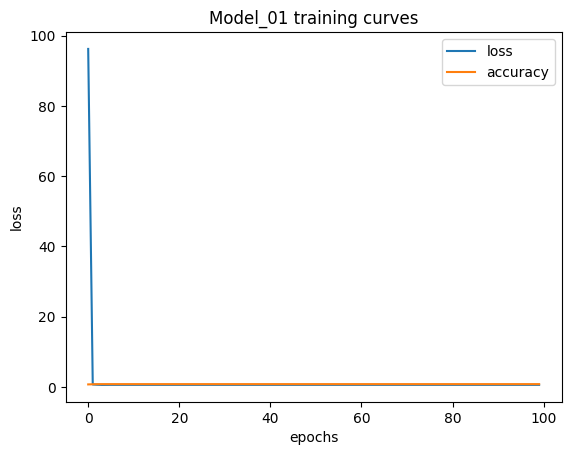

In [18]:
# Plot Loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Model_01 training curves");

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_02 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(100, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_02.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_02.fit(X_train, y_train, epochs=25 , verbose=0)

In [20]:
model_02.evaluate(X_test, y_test)

306/306 [==============================] - 1s 3ms/step - loss: 0.5433 - accuracy: 0.7665


[0.5432921648025513, 0.7665063142776489]

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_03 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_03.compile(loss="binary_crossentropy",
                optimizer= "Adam",
                metrics=["accuracy"])

# creating a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model
history = model_03.fit(X_train, y_train, epochs=50 ,callbacks = [lr_scheduler])
     

Epoch 1/50
1222/1222 [==============================] - 7s 4ms/step - loss: 3.5956 - accuracy: 0.7609 - lr: 1.0000e-04
Epoch 2/50
1222/1222 [==============================] - 5s 4ms/step - loss: 0.6526 - accuracy: 0.7595 - lr: 1.1220e-04
Epoch 3/50
1222/1222 [==============================] - 5s 4ms/step - loss: 0.6274 - accuracy: 0.7595 - lr: 1.2589e-04
Epoch 4/50
1222/1222 [==============================] - 5s 4ms/step - loss: 0.6049 - accuracy: 0.7595 - lr: 1.4125e-04
Epoch 5/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.5859 - accuracy: 0.7595 - lr: 1.5849e-04
Epoch 6/50
1222/1222 [==============================] - 5s 4ms/step - loss: 0.5711 - accuracy: 0.7595 - lr: 1.7783e-04
Epoch 7/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.5610 - accuracy: 0.7595 - lr: 1.9953e-04
Epoch 8/50
1222/1222 [==============================] - 5s 4ms/step - loss: 0.5553 - accuracy: 0.7595 - lr: 2.2387e-04
Epoch 9/50
1222/1222 [==========================

In [23]:
project = pd.read_csv("https://raw.githubusercontent.com/Chandu106/Adult_income/main/adult.csv")

In [24]:
project.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
project['income'].replace({'<=50K':0, ">50K":1},inplace=True)

In [26]:
project.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [50]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#create column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "fnlwgt", "educational-num","capital-gain","capital-loss","hours-per-week"]),
    # (OneHotEncoder(handle_unknown = "ignore"), ["workclass", "education", "marital-status","occupation","relationship","race","gender","native-country"])
)

# Create X & y
X = project.drop("income", axis=1)
y = project["income"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model
ct.fit(X_train)

#transform training and test data with normalization and one hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
     

In [54]:
X_test_normal[0]

array([0.53424658, 0.01414678, 0.53333333, 0.        , 0.        ,
       0.39795918])

In [52]:
# Set random seed
tf.random.set_seed(42)

model_04 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_04.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_04.fit(X_train_normal, y_train, epochs=50)



Epoch 1/50
1222/1222 [==============================] - 7s 4ms/step - loss: 0.4113 - accuracy: 0.8101
Epoch 2/50
1222/1222 [==============================] - 8s 7ms/step - loss: 0.3928 - accuracy: 0.8173
Epoch 3/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3900 - accuracy: 0.8190
Epoch 4/50
1222/1222 [==============================] - 5s 4ms/step - loss: 0.3889 - accuracy: 0.8185
Epoch 5/50
1222/1222 [==============================] - 4s 4ms/step - loss: 0.3875 - accuracy: 0.8210
Epoch 6/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3866 - accuracy: 0.8204
Epoch 7/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3849 - accuracy: 0.8209
Epoch 8/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3841 - accuracy: 0.8222
Epoch 9/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3826 - accuracy: 0.8223
Epoch 10/50
1222/1222 [==============================] - 5s 4ms/step - loss: 0.383

In [55]:
model_04.evaluate(X_test_normal,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.3706 - accuracy: 0.8316


[0.37060439586639404, 0.8316102027893066]

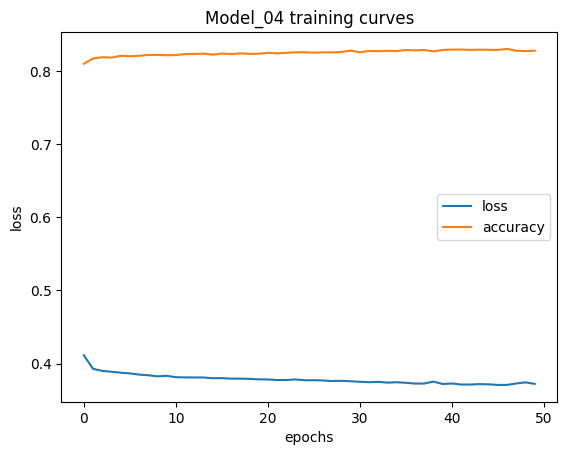

In [56]:
# Plot Loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Model_04 training curves");

In [57]:
# Set random seed
tf.random.set_seed(42)

model_05 = tf.keras.Sequential([
  tf.keras.layers.Dense(1024, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(2, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_05.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_05.fit(X_train_normal, y_train, epochs=25)



Epoch 1/25
1222/1222 [==============================] - 12s 6ms/step - loss: 0.4286 - accuracy: 0.8020
Epoch 2/25
1222/1222 [==============================] - 6s 5ms/step - loss: 0.4127 - accuracy: 0.8157
Epoch 3/25
1222/1222 [==============================] - 7s 6ms/step - loss: 0.4079 - accuracy: 0.8151
Epoch 4/25
1222/1222 [==============================] - 7s 5ms/step - loss: 0.4064 - accuracy: 0.8162
Epoch 5/25
1222/1222 [==============================] - 7s 6ms/step - loss: 0.4048 - accuracy: 0.8147
Epoch 6/25
1222/1222 [==============================] - 11s 9ms/step - loss: 0.4009 - accuracy: 0.8174
Epoch 7/25
1222/1222 [==============================] - 8s 6ms/step - loss: 0.3977 - accuracy: 0.8171
Epoch 8/25
1222/1222 [==============================] - 7s 6ms/step - loss: 0.3975 - accuracy: 0.8174
Epoch 9/25
1222/1222 [==============================] - 7s 6ms/step - loss: 0.3941 - accuracy: 0.8196
Epoch 10/25
1222/1222 [==============================] - 7s 5ms/step - loss: 0.3

In [58]:
model_05.evaluate(X_test_normal,y_test)

306/306 [==============================] - 1s 3ms/step - loss: 0.3757 - accuracy: 0.8301


[0.37572920322418213, 0.8300747275352478]

In [64]:
# Set random seed
tf.random.set_seed(42)

model_06 = tf.keras.Sequential([
  tf.keras.layers.Dense(2048, activation="relu"),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_06.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_06.fit(X_train_normal, y_train, epochs=25)



Epoch 1/25
1222/1222 [==============================] - 6s 3ms/step - loss: 0.4054 - accuracy: 0.8119
Epoch 2/25
1222/1222 [==============================] - 5s 4ms/step - loss: 0.3945 - accuracy: 0.8173
Epoch 3/25
1222/1222 [==============================] - 5s 4ms/step - loss: 0.3911 - accuracy: 0.8190
Epoch 4/25
1222/1222 [==============================] - 4s 3ms/step - loss: 0.3906 - accuracy: 0.8179
Epoch 5/25
1222/1222 [==============================] - 5s 4ms/step - loss: 0.3882 - accuracy: 0.8211
Epoch 6/25
1222/1222 [==============================] - 5s 4ms/step - loss: 0.3867 - accuracy: 0.8207
Epoch 7/25
1222/1222 [==============================] - 4s 3ms/step - loss: 0.3848 - accuracy: 0.8196
Epoch 8/25
1222/1222 [==============================] - 5s 4ms/step - loss: 0.3841 - accuracy: 0.8217
Epoch 9/25
1222/1222 [==============================] - 4s 3ms/step - loss: 0.3828 - accuracy: 0.8223
Epoch 10/25
1222/1222 [==============================] - 4s 3ms/step - loss: 0.383

In [65]:
model_06.evaluate(X_test_normal,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.3726 - accuracy: 0.8307


[0.3725924491882324, 0.8306888937950134]

In [66]:
# Set random seed
tf.random.set_seed(42)

model_07 = tf.keras.Sequential([
  tf.keras.layers.Dense(10000, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(1000, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_07.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_07.fit(X_train_normal, y_train, epochs=50)



Epoch 1/50
1222/1222 [==============================] - 10s 5ms/step - loss: 0.4083 - accuracy: 0.8101
Epoch 2/50
1222/1222 [==============================] - 8s 7ms/step - loss: 0.3972 - accuracy: 0.8160
Epoch 3/50
1222/1222 [==============================] - 8s 7ms/step - loss: 0.3921 - accuracy: 0.8175
Epoch 4/50
1222/1222 [==============================] - 8s 6ms/step - loss: 0.3913 - accuracy: 0.8182
Epoch 5/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3880 - accuracy: 0.8204
Epoch 6/50
1222/1222 [==============================] - 7s 5ms/step - loss: 0.3871 - accuracy: 0.8209
Epoch 7/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3853 - accuracy: 0.8202
Epoch 8/50
1222/1222 [==============================] - 7s 5ms/step - loss: 0.3844 - accuracy: 0.8207
Epoch 9/50
1222/1222 [==============================] - 6s 5ms/step - loss: 0.3829 - accuracy: 0.8222
Epoch 10/50
1222/1222 [==============================] - 7s 6ms/step - loss: 0.38

In [67]:
model_07.evaluate(X_test_normal,y_test)

306/306 [==============================] - 1s 3ms/step - loss: 0.3709 - accuracy: 0.8332


[0.37086865305900574, 0.8332480192184448]

In [68]:
y_preds = model_07.predict(X_test_normal)

306/306 [==============================] - 1s 3ms/step


In [69]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_07.predict(X_test_normal)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

306/306 [==============================] - 1s 2ms/step


array([[7108,  371],
       [1258, 1032]])

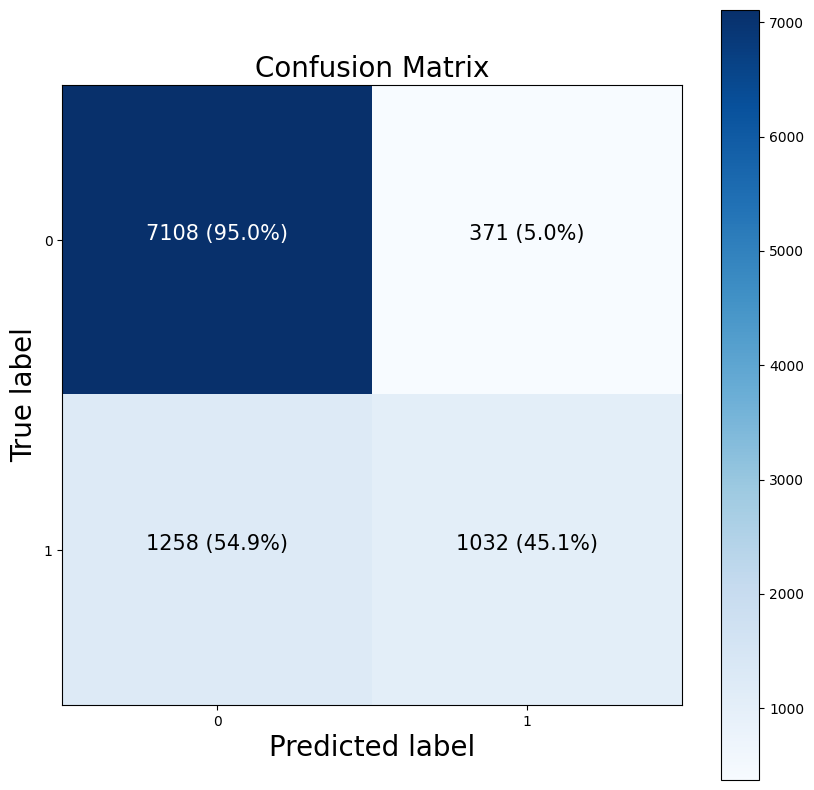

In [70]:
import itertools
import numpy as np

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


In [71]:
y1_preds=tf.cast(tf.round(y_preds),tf.int64)

In [73]:
import pandas as pd
pd.DataFrame(y1_preds , y_test)

,0
income,
0,0
0,0
1,1
0,0
0,0
...,...
1,1
1,1
1,0
